### Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_market = pd.read_csv('Stock_Market_Data.csv')

In [3]:
stock_market

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19
...,...,...,...,...,...,...,...
49153,26-06-2022,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00
49154,27-06-2022,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00
49155,28-06-2022,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00
49156,29-06-2022,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00


In [4]:
# Filter the data for the specific company 'RECKITTBEN'
specific_company_data = stock_market[stock_market['Name'] == 'RECKITTBEN']

In [5]:
specific_company_data.describe()

,Open,High,Low,Close,Volume
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,5356.684298,5399.400826,5308.786777,5342.024793,863.702479
std,437.598174,438.786470,436.682826,436.756126,699.434315
min,4680.000000,4707.000000,4565.700000,4673.500000,67.000000
25%,4900.000000,4930.000000,4840.000000,4875.500000,374.000000
50%,5385.100000,5419.000000,5349.100000,5382.400000,606.000000
75%,5800.000000,5860.000000,5762.300000,5797.500000,1168.000000
max,6000.000000,6050.000000,5975.000000,6000.500000,4317.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_7696\2910109525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_company_data['Date'] = pd.to_datetime(specific_company_data['Date'], format='%d-%m-%Y')


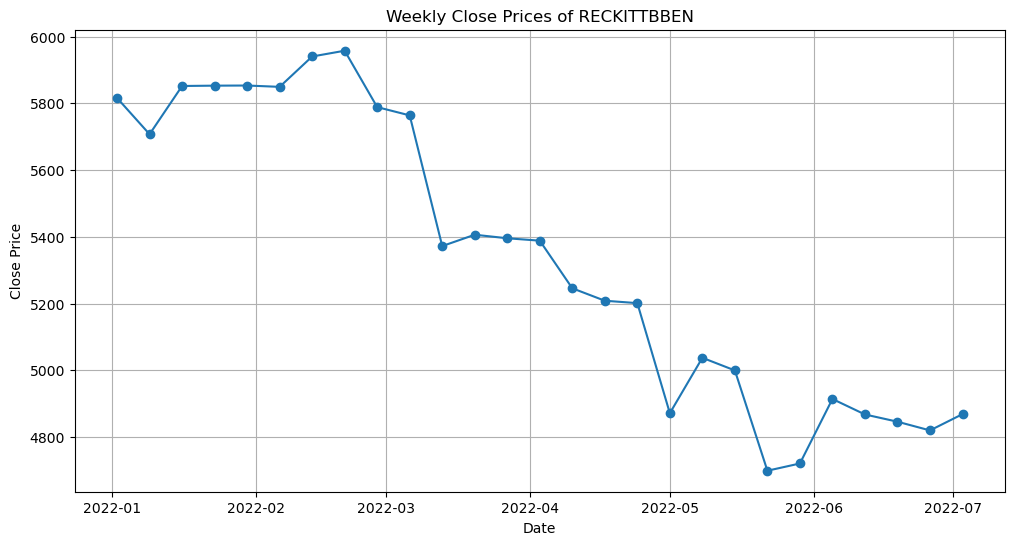

In [6]:
specific_company_data['Date'] = pd.to_datetime(specific_company_data['Date'], format='%d-%m-%Y')

specific_company_data.set_index('Date', inplace=True)

weekly_data = specific_company_data['Close'].resample('W').last()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Weekly Close Prices of RECKITTBBEN')
plt.grid(True)
plt.show()


Outliers in the 'Close' prices:
Empty DataFrame
Columns: [Name, Open, High, Low, Close, Volume]
Index: []


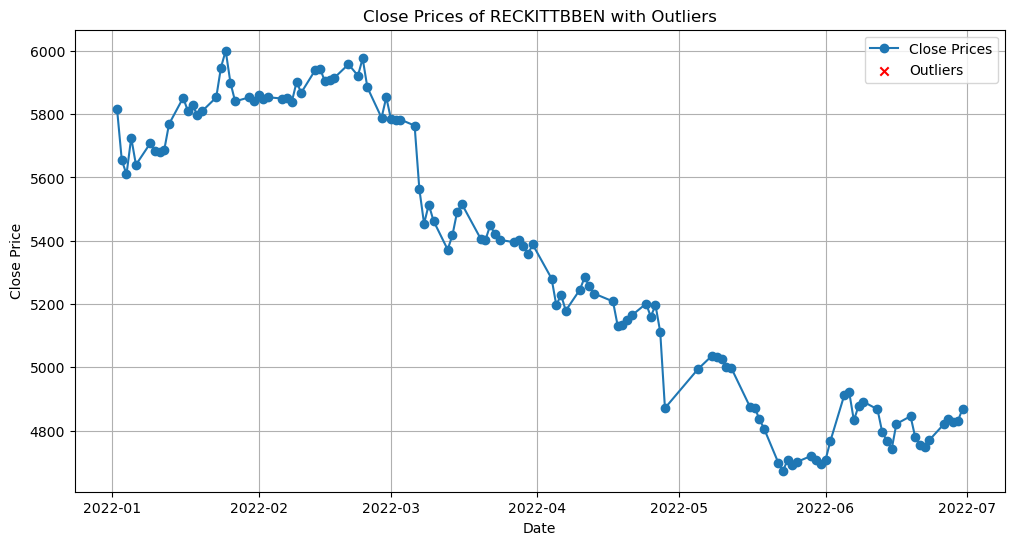

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = specific_company_data['Close'].quantile(0.25)
Q3 = specific_company_data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = specific_company_data[(specific_company_data['Close'] < lower_bound) | (specific_company_data['Close'] > upper_bound)]

# Print outliers
print("Outliers in the 'Close' prices:")
print(outliers)

# Plot the data to visualize the outliers
plt.figure(figsize=(12, 6))
plt.plot(specific_company_data.index, specific_company_data['Close'], label='Close Prices', marker='o', linestyle='-')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of RECKITTBBEN with Outliers')
plt.legend()
plt.grid(True)
plt.show()

### Part 2

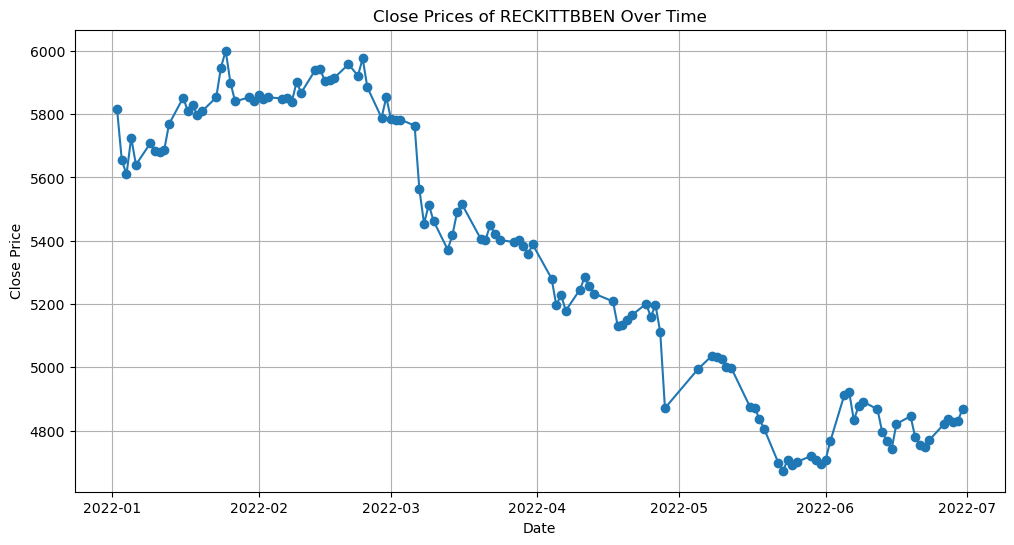

In [8]:
# Plot the 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(specific_company_data.index, specific_company_data['Close'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of RECKITTBBEN Over Time')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7696\3532914679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_company_data['Daily Change %'] = specific_company_data['Close'].pct_change() * 100


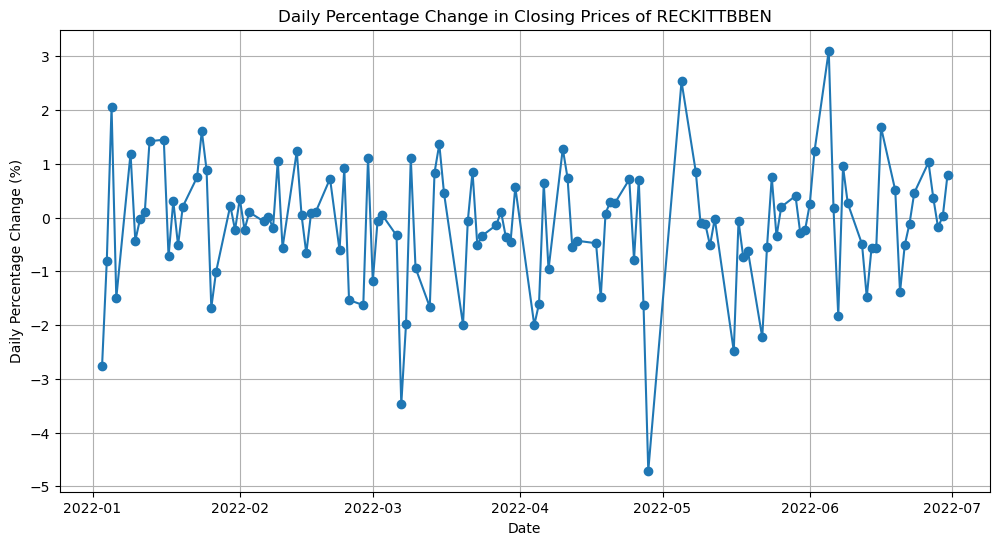

In [9]:
# Calculate the daily percentage change in closing prices
specific_company_data['Daily Change %'] = specific_company_data['Close'].pct_change() * 100

# Plot the daily percentage change
plt.figure(figsize=(12, 6))
plt.plot(specific_company_data.index, specific_company_data['Daily Change %'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.title('Daily Percentage Change in Closing Prices of RECKITTBBEN')
plt.grid(True)
plt.show()

In [12]:
!!pip install statsmodels

['WARNING: Ignoring invalid distribution -atplotlib (d:\\anaconda\\envs\\tf\\lib\\site-packages)',
 'Collecting statsmodels',
 '  Downloading statsmodels-0.14.2-cp310-cp310-win_amd64.whl.metadata (9.5 kB)',
 'Requirement already satisfied: numpy>=1.22.3 in d:\\anaconda\\envs\\tf\\lib\\site-packages (from statsmodels) (1.26.4)',
 'Requirement already satisfied: scipy!=1.9.2,>=1.8 in d:\\anaconda\\envs\\tf\\lib\\site-packages (from statsmodels) (1.11.4)',
 'Requirement already satisfied: pandas!=2.1.0,>=1.4 in d:\\anaconda\\envs\\tf\\lib\\site-packages (from statsmodels) (2.2.1)',
 'Collecting patsy>=0.5.6 (from statsmodels)',
 '  Downloading patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)',
 'Requirement already satisfied: packaging>=21.3 in d:\\anaconda\\envs\\tf\\lib\\site-packages (from statsmodels) (23.2)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in d:\\anaconda\\envs\\tf\\lib\\site-packages (from pandas!=2.1.0,>=1.4->statsmodels) (2.9.0.post0)',
 'Requirement alr

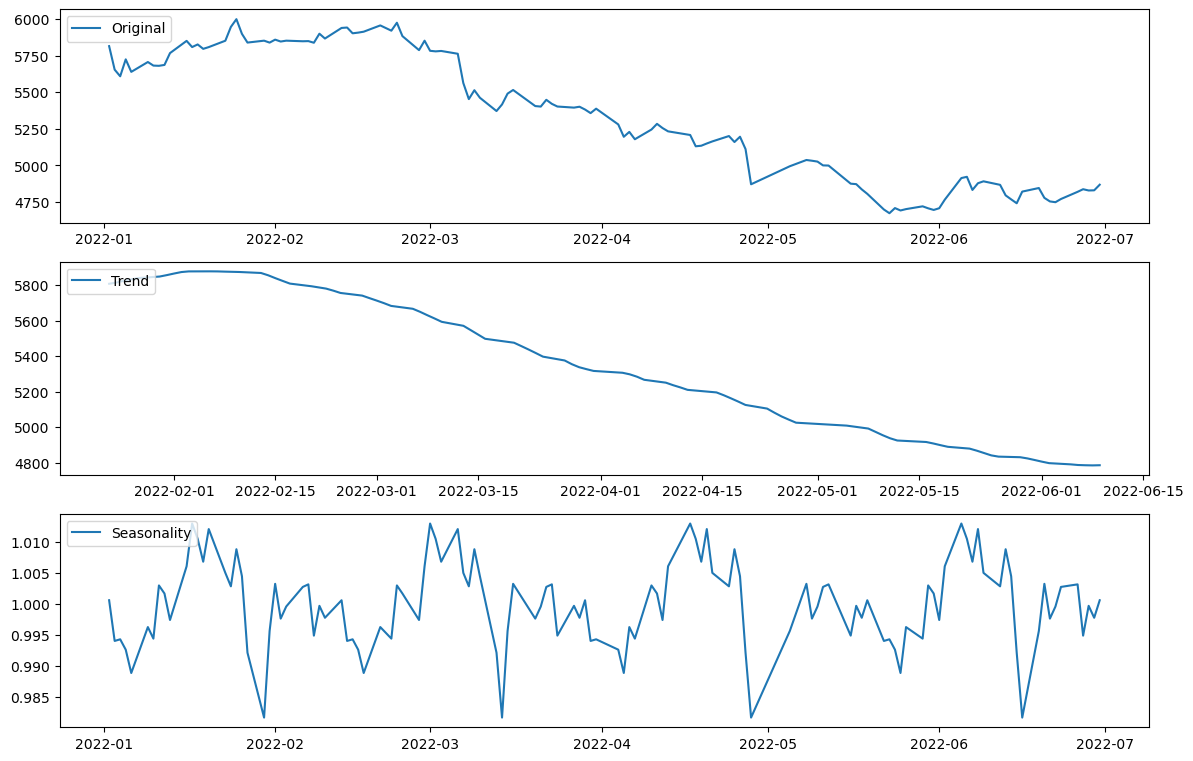

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series data
decomposition = seasonal_decompose(specific_company_data['Close'], model='multiplicative', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(specific_company_data['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7696\764399485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_company_data['15-day MA'] = specific_company_data['Close'].rolling(window=15).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_7696\764399485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_company_data['30-day MA'] = specific_company_data['Close'].rolling(window=30).mean()


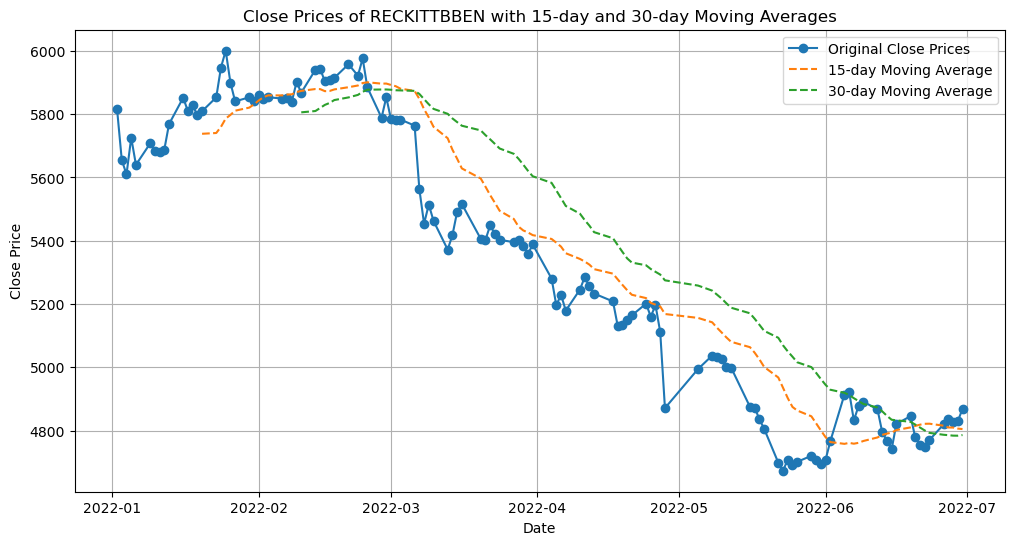

In [15]:
# Calculate the moving averages
specific_company_data['15-day MA'] = specific_company_data['Close'].rolling(window=15).mean()
specific_company_data['30-day MA'] = specific_company_data['Close'].rolling(window=30).mean()

# Plot the original 'Close' prices and the moving averages
plt.figure(figsize=(12, 6))
plt.plot(specific_company_data.index, specific_company_data['Close'], label='Original Close Prices', marker='o', linestyle='-')
plt.plot(specific_company_data.index, specific_company_data['15-day MA'], label='15-day Moving Average', linestyle='--')
plt.plot(specific_company_data.index, specific_company_data['30-day MA'], label='30-day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of RECKITTBBEN with 15-day and 30-day Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Calculate the average closing price for each stock
average_closing_prices = stock_market.groupby('Name')['Close'].mean().reset_index()

# Rename the column for clarity
average_closing_prices.rename(columns={'Close': 'Average Closing Price'}, inplace=True)

# Display the result
print(average_closing_prices)

                          Name  Average Closing Price
0                      01.Bank              21.260902
1                    02.Cement              96.600820
2           03.Ceramics_Sector              71.225164
3               04.Engineering             132.352459
4    05.Financial_Institutions              29.253525
..                         ...                    ...
407                 WMSHIPYARD              12.370492
408                        YPL              21.339344
409                 ZAHEENSPIN               9.964754
410                   ZAHINTEX               7.858197
411                 ZEALBANGLA             150.338525

[412 rows x 2 columns]


In [19]:
# Calculate the average closing price for each stock
average_closing_prices = stock_market.groupby('Name')['Close'].mean().reset_index()

# Identify the top 5 stocks based on average closing price
top_5_stocks = average_closing_prices.nlargest(5, 'Close')

# Identify the bottom 5 stocks based on average closing price
bottom_5_stocks = average_closing_prices.nsmallest(5, 'Close')

# Display the top 5 stocks
print("Top 5 Stocks by Average Closing Price:")
print(top_5_stocks)

# Display the bottom 5 stocks
print("Bottom 5 Stocks by Average Closing Price:")
print(bottom_5_stocks)

Top 5 Stocks by Average Closing Price:
           Name        Close
56    APSCLBOND  5413.238636
320  RECKITTBEN  5342.024793
298   PREBPBOND  4918.357143
178  IBBL2PBOND  4851.330357
283    PBLPBOND  4836.195652
Bottom 5 Stocks by Average Closing Price:
           Name     Close
144   FAMILYTEX  4.698361
187    ICBIBANK  4.725620
149       FBFIF  5.289344
293  POPULAR1MF  5.368033
291      PHPMF1  5.417213


### Part 3

C:\Users\USER\AppData\Local\Temp\ipykernel_7696\70638196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_company_data['Rolling Std Dev'] = specific_company_data['Close'].rolling(window=30).std()


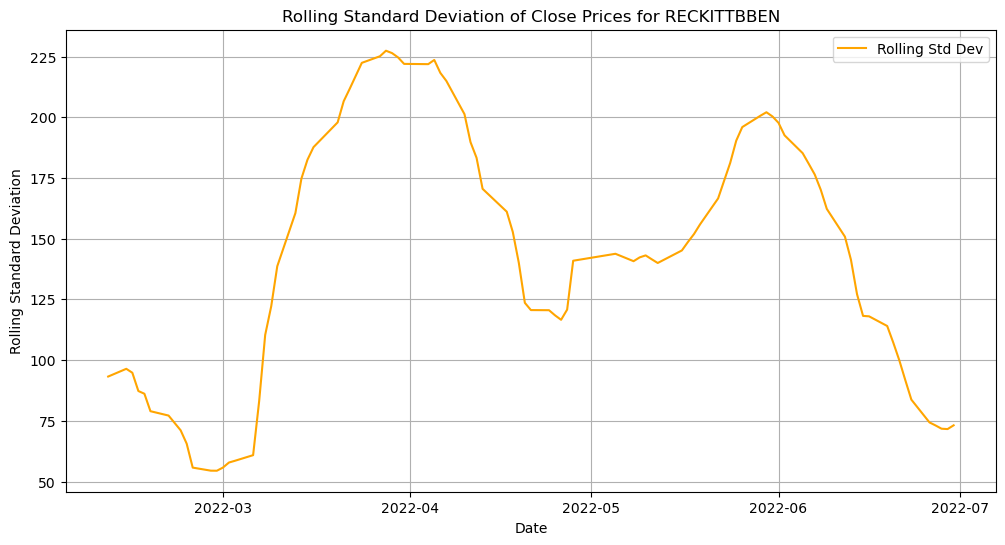

In [20]:
# Calculate the rolling standard deviation with a window of 30 days
specific_company_data['Rolling Std Dev'] = specific_company_data['Close'].rolling(window=30).std()

# Plot the rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(specific_company_data.index, specific_company_data['Rolling Std Dev'], label='Rolling Std Dev', color='orange')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('Rolling Standard Deviation of Close Prices for RECKITTBBEN')
plt.legend()
plt.grid(True)
plt.show()

In [21]:

# Calculate the daily price change (Close - Open)
specific_company_data['Daily Price Change'] = specific_company_data['Close'] - specific_company_data['Open']

# Display the DataFrame with the new column
print(specific_company_data.head())

                  Name    Open    High     Low   Close  Volume  \
Date                                                             
2022-01-02  RECKITTBEN  5760.1  5889.0  5748.1  5816.1  1592.0   
2022-01-03  RECKITTBEN  5795.0  5823.9  5630.0  5655.2  1492.0   
2022-01-04  RECKITTBEN  5670.0  5670.0  5560.0  5609.9  1394.0   
2022-01-05  RECKITTBEN  5600.0  5738.8  5600.0  5725.6   323.0   
2022-01-06  RECKITTBEN  5640.3  5680.0  5616.0  5640.1   767.0   

            Daily Change %  15-day MA  30-day MA  Rolling Std Dev  \
Date                                                                
2022-01-02             NaN        NaN        NaN              NaN   
2022-01-03       -2.766459        NaN        NaN              NaN   
2022-01-04       -0.801033        NaN        NaN              NaN   
2022-01-05        2.062425        NaN        NaN              NaN   
2022-01-06       -1.493293        NaN        NaN              NaN   

            Daily Price Change  
Date                

C:\Users\USER\AppData\Local\Temp\ipykernel_7696\2483733830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_company_data['Daily Price Change'] = specific_company_data['Close'] - specific_company_data['Open']


D:\anaconda\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


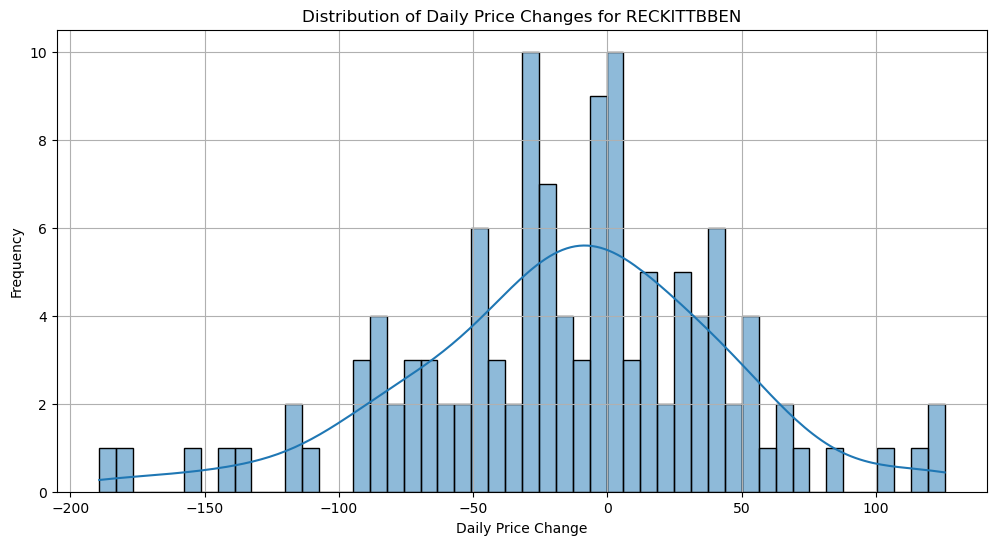

count    121.000000
mean     -14.659504
std       57.958390
min     -189.200000
25%      -48.400000
50%       -8.700000
75%       24.600000
max      125.600000
Name: Daily Price Change, dtype: float64


In [22]:
# Plot the distribution of daily price changes
plt.figure(figsize=(12, 6))
sns.histplot(specific_company_data['Daily Price Change'], bins=50, kde=True)
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Price Changes for RECKITTBBEN')
plt.grid(True)
plt.show()

# Display basic statistics for the daily price changes
print(specific_company_data['Daily Price Change'].describe())

In [23]:
# Identify the day with the largest price increase
largest_increase_day = specific_company_data['Daily Price Change'].idxmax()
largest_increase_value = specific_company_data['Daily Price Change'].max()

# Identify the day with the largest price decrease
largest_decrease_day = specific_company_data['Daily Price Change'].idxmin()
largest_decrease_value = specific_company_data['Daily Price Change'].min()

# Display the results
print(f"The day with the largest price increase is {largest_increase_day} with a change of {largest_increase_value:.2f}")
print(f"The day with the largest price decrease is {largest_decrease_day} with a change of {largest_decrease_value:.2f}")

The day with the largest price increase is 2022-01-05 00:00:00 with a change of 125.60
The day with the largest price decrease is 2022-03-07 00:00:00 with a change of -189.20


In [24]:
# Calculate the mean and standard deviation of the trading volumes for each stock
volume_stats = stock_market.groupby('Name')['Volume'].agg(['mean', 'std']).reset_index()

# Merge the volume stats back with the original data
stock_market = stock_market.merge(volume_stats, on='Name', how='left')

# Define the threshold for unusually high volume (mean + 2 * std)
stock_market['High Volume Threshold'] = stock_market['mean'] + 2 * stock_market['std']

# Identify days with unusually high trading volume
unusual_volume_days = stock_market[stock_market['Volume'] > stock_market['High Volume Threshold']]

# Select relevant columns to display
unusual_volume_days = unusual_volume_days[['Date', 'Name', 'Volume', 'High Volume Threshold']]

# Display the results
print("Stocks with unusually high trading volume on certain days:")
print(unusual_volume_days)

Stocks with unusually high trading volume on certain days:
             Date        Name      Volume  High Volume Threshold
4      06-01-2022     01.Bank  2586344.19           2.036855e+06
7      11-01-2022     01.Bank  2224838.94           2.036855e+06
21     31-01-2022     01.Bank  2844397.21           2.036855e+06
26     06-01-2022   02.Cement   872785.14           7.602434e+05
27     09-01-2022   02.Cement  1019975.29           7.602434e+05
...           ...         ...         ...                    ...
48881  14-06-2022   USMANIAGL   153722.00           9.939438e+04
48887  22-06-2022   USMANIAGL   134778.00           9.939438e+04
48943  08-06-2022   VAMLBDMF1   696203.00           4.716416e+05
48965  08-06-2022    VAMLRBBF   312098.00           3.091108e+05
49113  30-06-2022  ZAHEENSPIN  1820824.00           1.347407e+06

[2326 rows x 4 columns]


### Part 4

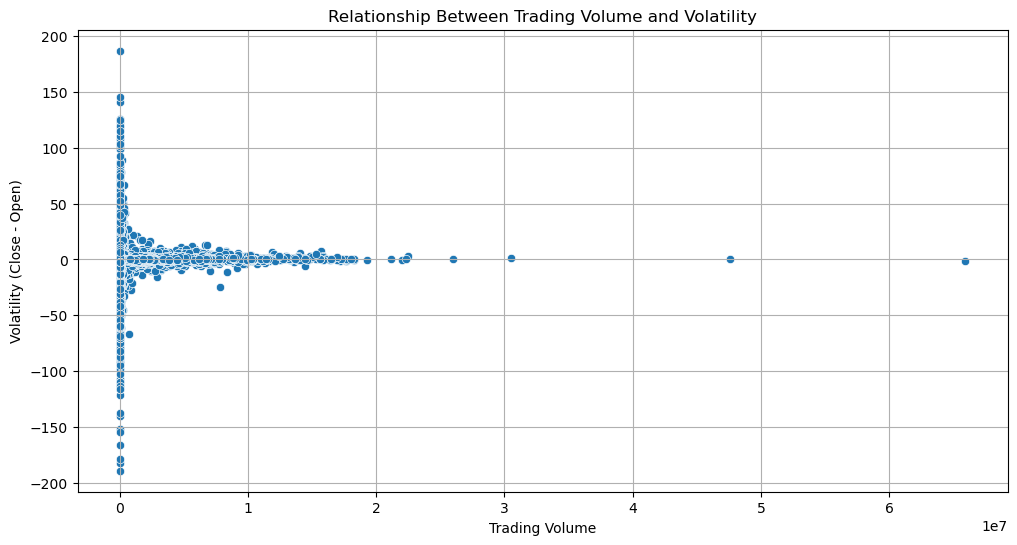

Correlation between trading volume and volatility: 0.04


In [25]:
# Calculate the daily price change (Close - Open) as a measure of volatility
stock_market['Volatility'] = stock_market['Close'] - stock_market['Open']

# Scatter plot of trading volume vs. volatility
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volume', y='Volatility', data=stock_market)
plt.xlabel('Trading Volume')
plt.ylabel('Volatility (Close - Open)')
plt.title('Relationship Between Trading Volume and Volatility')
plt.grid(True)
plt.show()

# Calculate the correlation between trading volume and volatility
correlation = stock_market['Volume'].corr(stock_market['Volatility'])
print(f"Correlation between trading volume and volatility: {correlation:.2f}")

D:\anaconda\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

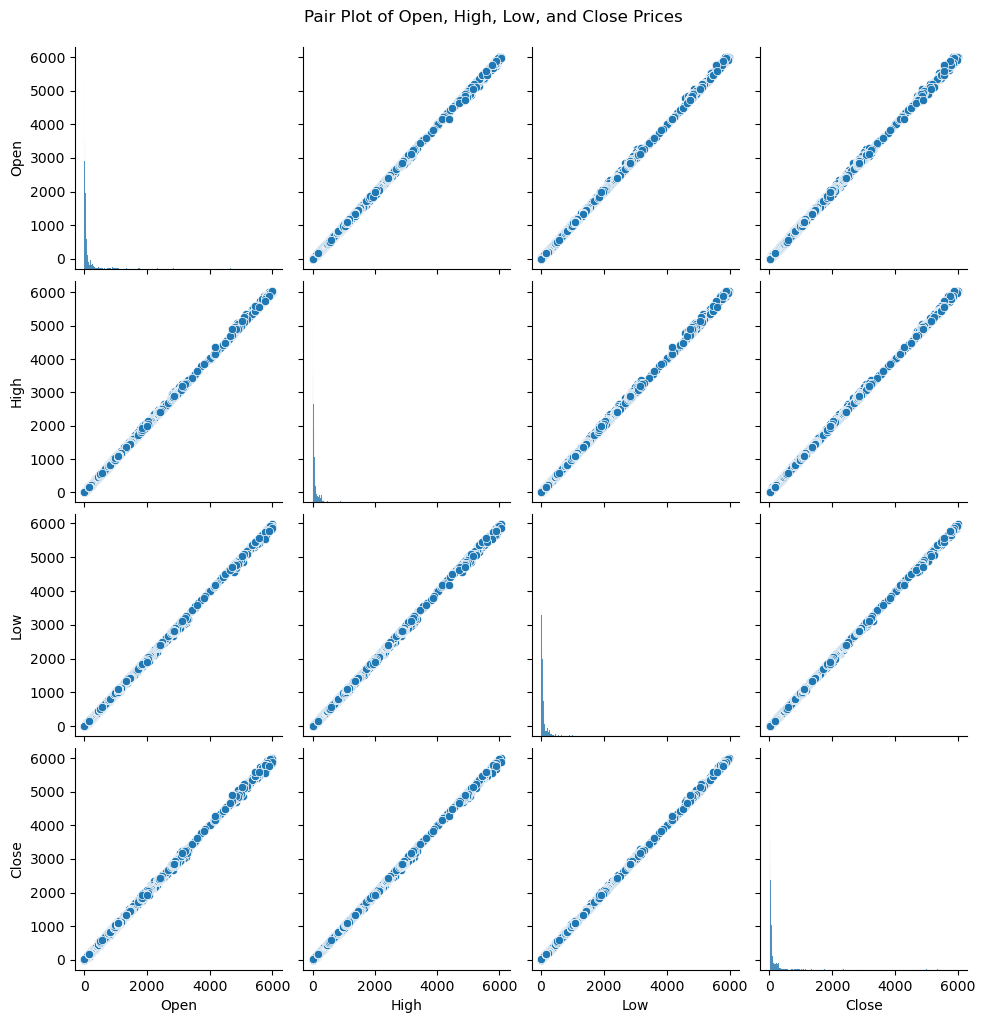

In [27]:
# Plot pair plots to visualize relationships between 'Open', 'High', 'Low', and 'Close' prices
sns.pairplot(stock_market[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pair Plot of Open, High, Low, and Close Prices', y=1.02)
plt.show()

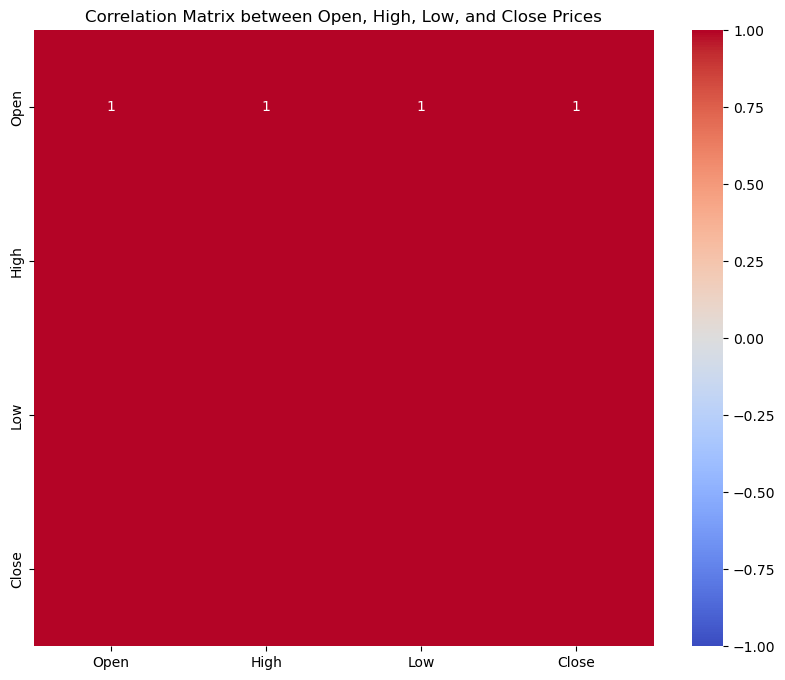

In [29]:
# Calculate the correlation matrix between 'Open', 'High', 'Low', and 'Close' prices
correlation_matrix = stock_market[['Open', 'High', 'Low', 'Close']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix between Open, High, Low, and Close Prices')
plt.show()

### Bonus

           Date        Name    Open    High     Low   Close  Volume  \
6875 2022-01-02  RECKITTBEN  5760.1  5889.0  5748.1  5816.1  1592.0   
6876 2022-01-03  RECKITTBEN  5795.0  5823.9  5630.0  5655.2  1492.0   
6877 2022-01-04  RECKITTBEN  5670.0  5670.0  5560.0  5609.9  1394.0   
6878 2022-01-05  RECKITTBEN  5600.0  5738.8  5600.0  5725.6   323.0   
6879 2022-01-06  RECKITTBEN  5640.3  5680.0  5616.0  5640.1   767.0   

            mean         std  High Volume Threshold  Volatility  
6875  863.702479  699.434315            2262.571109        56.0  
6876  863.702479  699.434315            2262.571109      -139.8  
6877  863.702479  699.434315            2262.571109       -60.1  
6878  863.702479  699.434315            2262.571109       125.6  
6879  863.702479  699.434315            2262.571109        -0.2  
           Date   Close  7_Day_Rolling_Avg
6875 2022-01-02  5816.1                NaN
6876 2022-01-03  5655.2                NaN
6877 2022-01-04  5609.9                NaN
6878 

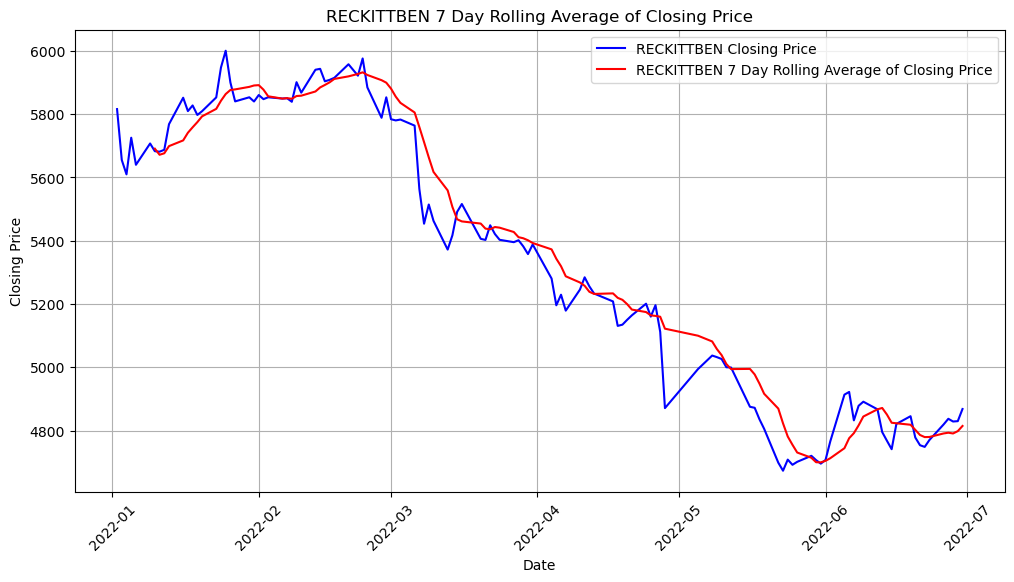

In [33]:
# Define the specific company
specific_company = 'RECKITTBEN'

# Filter the data for the specific company 'RECKITTBBEN'
specific_data = stock_market[stock_market['Name'] == specific_company].copy()

# Convert the 'Date' column to datetime format
specific_data['Date'] = pd.to_datetime(specific_data['Date'], format='%d-%m-%Y')

# Verify the data
print(specific_data.head())

# Calculate the 7-day rolling average of the 'Close' prices
specific_data['7_Day_Rolling_Avg'] = specific_data['Close'].rolling(window=7).mean()

# Verify the rolling average calculation
print(specific_data[['Date', 'Close', '7_Day_Rolling_Avg']].head(20))

# Plot the 'Close' prices and the 7-day rolling average
plt.figure(figsize=(12, 6))
plt.plot(specific_data['Date'], specific_data['Close'], label=f'{specific_company} Closing Price', color='blue')
plt.plot(specific_data['Date'], specific_data['7_Day_Rolling_Avg'], label=f'{specific_company} 7 Day Rolling Average of Closing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{specific_company} 7 Day Rolling Average of Closing Price')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()